<a href="https://colab.research.google.com/github/15kay/DSI/blob/main/Day_4_Supervised_Learning_Practical_Kgaugelo_Mmakola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA MODELLING**

**Mount your google drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## SUPERVISED LEARNING - Regression

**Read in the processed housing data set from your drive folder using pandas.**

In [244]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Shared with students/Practicals/Day 4 - Supervised Learning Prac/data_processed.csv')

**View the dataset using 'display' or 'head'**

In [6]:
display(df)


,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,0.098361,0.121212,0.18750,0.120755,0.003888,0.2,0.0,0.0,0.50,...,0.165217,0.000000,0.580808,0.697603,0.107973,0.223886,0.006432,0.0,0.454545,0.500000
1,1,0.087213,0.151515,0.43750,0.183396,0.006623,0.4,0.0,0.0,0.50,...,0.765217,0.000000,0.257576,0.789287,0.332226,0.433832,0.012244,0.0,0.545455,0.700000
2,2,0.027410,0.090909,0.21875,0.093585,0.005500,0.0,0.0,0.0,0.50,...,0.765217,0.000000,0.207071,0.327328,0.367940,0.220444,0.010372,1.0,0.181818,0.766667
3,3,0.049836,0.060606,0.12500,0.086038,0.002714,0.2,0.0,0.0,0.25,...,0.217391,0.000000,0.575758,0.831269,0.182724,0.180864,0.003560,1.0,0.000000,0.866667
4,4,0.029115,0.090909,0.31250,0.105660,0.002707,0.4,0.0,0.0,0.50,...,0.886957,0.000000,0.186869,0.322020,0.418605,0.246257,0.004689,0.0,0.818182,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,0.114754,0.090909,0.40625,0.208302,0.011129,0.0,1.0,1.0,0.75,...,0.539130,0.000000,0.994949,0.373492,0.160299,0.132679,0.080779,0.0,0.454545,0.633333
21609,21609,0.113443,0.121212,0.31250,0.216604,0.023891,0.0,0.0,0.0,0.50,...,0.695652,0.000000,0.020202,0.781567,0.300664,0.602478,0.041115,0.0,0.545455,0.933333
21610,21610,0.085902,0.121212,0.28125,0.143396,0.005142,0.4,0.0,0.0,0.75,...,0.669565,0.000000,0.161616,0.861670,0.274917,0.308209,0.011028,1.0,0.181818,0.333333
21611,21611,0.235410,0.151515,0.50000,0.318491,0.008877,0.4,0.0,0.0,0.50,...,0.600000,0.993548,0.196970,0.603185,0.241694,0.535364,0.014760,0.0,0.363636,0.166667


There seems to be a extra column due to exporting the dataframe to csv, so lets remove it.

**Drop the 0 column**

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)
display(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0.098361,0.121212,0.18750,0.120755,0.003888,0.2,0.0,0.0,0.50,0.583333,...,0.165217,0.000000,0.580808,0.697603,0.107973,0.223886,0.006432,0.0,0.454545,0.500000
1,0.087213,0.151515,0.43750,0.183396,0.006623,0.4,0.0,0.0,0.50,0.666667,...,0.765217,0.000000,0.257576,0.789287,0.332226,0.433832,0.012244,0.0,0.545455,0.700000
2,0.027410,0.090909,0.21875,0.093585,0.005500,0.0,0.0,0.0,0.50,0.500000,...,0.765217,0.000000,0.207071,0.327328,0.367940,0.220444,0.010372,1.0,0.181818,0.766667
3,0.049836,0.060606,0.12500,0.086038,0.002714,0.2,0.0,0.0,0.25,0.500000,...,0.217391,0.000000,0.575758,0.831269,0.182724,0.180864,0.003560,1.0,0.000000,0.866667
4,0.029115,0.090909,0.31250,0.105660,0.002707,0.4,0.0,0.0,0.50,0.500000,...,0.886957,0.000000,0.186869,0.322020,0.418605,0.246257,0.004689,0.0,0.818182,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.114754,0.090909,0.40625,0.208302,0.011129,0.0,1.0,1.0,0.75,0.583333,...,0.539130,0.000000,0.994949,0.373492,0.160299,0.132679,0.080779,0.0,0.454545,0.633333
21609,0.113443,0.121212,0.31250,0.216604,0.023891,0.0,0.0,0.0,0.50,0.750000,...,0.695652,0.000000,0.020202,0.781567,0.300664,0.602478,0.041115,0.0,0.545455,0.933333
21610,0.085902,0.121212,0.28125,0.143396,0.005142,0.4,0.0,0.0,0.75,0.583333,...,0.669565,0.000000,0.161616,0.861670,0.274917,0.308209,0.011028,1.0,0.181818,0.333333
21611,0.235410,0.151515,0.50000,0.318491,0.008877,0.4,0.0,0.0,0.50,0.750000,...,0.600000,0.993548,0.196970,0.603185,0.241694,0.535364,0.014760,0.0,0.363636,0.166667


Now we have a dataset that is in the correct format and has already been explored a bit during a previous prac.

In the excersie after the presentaion we talked about a data set about property sales. We concluded that to create a model to determine the sale price for the given input we would use regression.

**TEST/TRAIN split**

Since we want to predict the price, lets set our target or 'y' as the price and then remove it from the dataset (X).

y = f(X)

In [37]:
y = df[['price']]
x = df.drop(['price'],axis=1)



,price
0,0.098361
1,0.087213
2,0.027410
3,0.049836
4,0.029115


Next we have to **split our dataset** (X) and target (y) into the training and testing data set using the sklearn.model_selection "train_test_split" function.

In [39]:
from sklearn.model_selection import train_test_split

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


**Linear Regression**

If we think back on the visualistion that we did on this dataset in day 2, we saw some linear relationships between variables.

So lets see how well a linear regression model will do.

**Import the machine learning package LinearRegression from the library 'sklearn'**

In [41]:
from sklearn.linear_model import LinearRegression

**Set your model** (We are going to use LinearRegression.)

In [43]:
model = LinearRegression()


**Fit the model** to the training data.

In [45]:
model.fit(X_train,y_train)

LinearRegression()

Finaly use the fitted model to **predict the test price** and calculate the accuracy by useing "score".

In [46]:
model.score(X_test,y_test)

0.6845047741258912

Grab a sample (row) from the test set so that you can do a prediction.

In [61]:
X_demo = X_test.iloc[5].values.reshape(1,-1)
y_demo = y_test.iloc[5]

y_demo

price    0.055738
Name: 3294, dtype: float64

Predict the house price for X_demo

In [65]:
y_pred = model.predict(X_demo)
y_pred[0][0]
y_demo[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.0557377049180327

Lets see if we can try another algorithms what will let us do some parameter tuning, such as support vector regression.

## Support vector regression

Since we want to do some parameter tuning, we do not want to tune the parameters using the test dataset.

Set up a SVR with parameters kernel='linear', C=0.1 and epsilon=0.01.

In [94]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate, KFold
model = SVR(kernel='rbf', C=0.1, epsilon=0.01)
scores = cross_validate(model, np.array(X_train), np.array(y_train), cv=5)
result = np.mean(scores['test_score'])
result


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.8105235776051986

The next step would be to tune the parameters to get a better result. BUT this can't just be done by changing the values and looking at the test scores, since that may leed to overfitting.

Hence cross validatoin should be employed, using the "cross_validate" sklearn.model_selection function. https://scikit-learn.org/stable/modules/cross_validation.html

Once the cross validation is incorporated, more information on the parameters that can be tuned are in the link below
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Change the parameters and see how the score changes.

**TIP**: don't 'fine tune' the parameters, rather change the order of magnitude e.g. C=0.1, 1, 10, etc.

In [ ]:
result = np.mean(scores['test_score'])
result

Once you are satified with the validation test score, fit the model to the training data and view the score of the test set.

## SUPERVISED LEARNING - Classification

Lets look at a very simple example for classification.

**Download the (famous) iris dataset** using seaborn

This dataset is already cleaned, so we don't have to check for missing values or outliers. But we will habe to
1. look at our data so that we can better understand it,
2. normalise (just to be safe - it's good practice),
3. encode the strings,
4. randomise and
5. split the data into testing and training (4 and 5 can be done together by using 'random state').

In [245]:
import pandas as pd
import seaborn as sb
df = sb.load_dataset('iris')


**1. Look at the data.** using print and describe()

In [98]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Visualise the data using a seaborn [swarm plot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)**


Set x equal to 'species' and select any one of the other parameters (one of the feature vectors) as y in the plot.

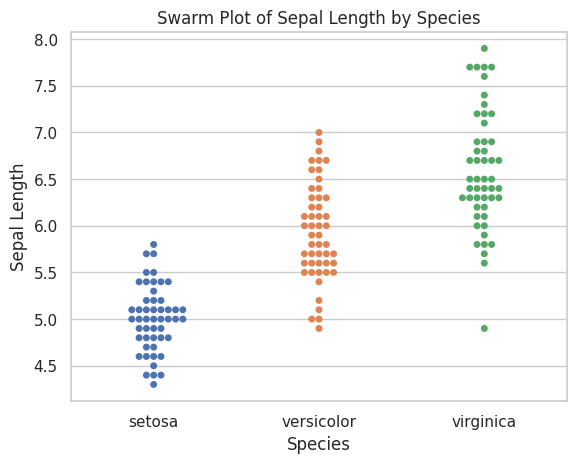

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = sns.load_dataset("iris")  # Load the Iris dataset for demonstration

# Create a swarm plot
sns.swarmplot(x="species", y="sepal_length",hue='species', data=data)

# Customize the plot (add labels, title, etc.)
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Swarm Plot of Sepal Length by Species")

# Show the plot
plt.show()



Let us now roughly follow the procedure from the previous excersise starting with **identifying and setting X and y**

In [247]:
y = df['species']
x = df.drop(columns=['species'])

**2.** Next, we **normalise** X.

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(x)
X_norm = scaler.transform(x)


**3.** This dataset contains strings (in the species column) and so have to be set to integers.
Instead of doing this manualy, a Label **Encoder** can be used (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [249]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_transform = label_encoder.fit_transform(y)


**4 & 5.** Divide the data into the **train and test** set using test_size=0.3.

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X_norm, y_transform, test_size=0.3, random_state=15)


**Select and set up a classifier (Ransom Forest)**

In [251]:
from sklearn.ensemble import RandomForestClassifier

Tune the hyperparameters on the training dataset using cross_validation.

In [252]:
model = RandomForestClassifier(min_samples_split=2, max_features='log2')
model_trained = cross_validate(model,X_train,y_train,cv=3)
result = np.mean(model_trained['test_score'])
result

0.9333333333333332

Fit the model with the optimal parameters and

predict the test set (X_test).

In [253]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       2])

Calculate the [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [261]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,prediction, average='macro')
f1

1.0

Lets plot the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to get a visual on the model performance.

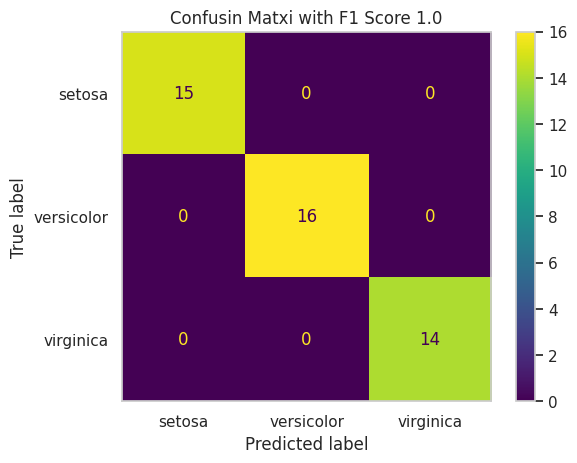

In [263]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.grid(False)
plt.title('Confusin Matxi with F1 Score ' + str(f1))
plt.xticks([0,1,2], y.unique())
plt.yticks([0,1,2], y.unique())
plt.show()
